#Homework 3: Deep Reinforcement Learning

##Libraries

In [ ]:
!pip install gym

In [ ]:
import os
import random
import torch
import numpy as np
import pandas as pd
import gym
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import copy

from torch import nn
from torchvision import transforms
from collections import deque # this python module implements exactly what we need for the replay memeory

#Device
global device
dev = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(dev)

##Work folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Colab Notebooks/Neural Networks and Deep Learning/Homework3'
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Neural Networks and Deep Learning/Homework3


## Enable gym environment rendering in Colab

In [ ]:
!apt update
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,786 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.download

In [ ]:
import glob
import io
import base64
import os
from IPython.display import HTML
from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from gym.wrappers import Monitor

In [ ]:
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_videos():
  mp4list = glob.glob('video/*.mp4')
  mp4list.sort()
  for mp4 in mp4list:
    print(f"\nSHOWING VIDEO {mp4}")
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    
def wrap_env(env, video_callable=None):
  env = Monitor(env, './video', force=True, video_callable=video_callable)
  return env

## Gym Environment (CartPole-v1)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

https://gym.openai.com/envs/CartPole-v1/

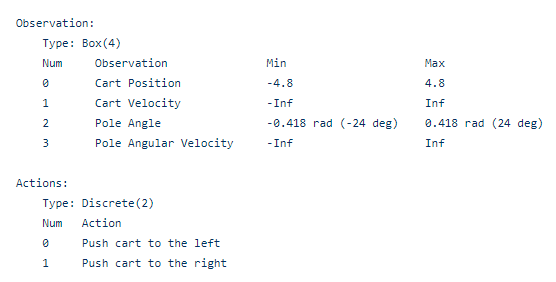

In [ ]:
### Create environment
env = gym.make('CartPole-v1') # Initialize the Gym environment
env.seed(0) # Set a random seed for the environment (reproducible results)

# Get the shapes of the state space (observation_space) and action space (action_space)
state_space_dim = env.observation_space.shape[0]
action_space_dim = env.action_space.n

print(f"STATE SPACE SIZE: {state_space_dim}")
print(f"ACTION SPACE SIZE: {action_space_dim}")

STATE SPACE SIZE: 4
ACTION SPACE SIZE: 2


### Random agent

In [ ]:
# Initialize the Gym environment
env = gym.make('CartPole-v1') 
env.seed(0) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True)

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    state = env.reset()
    # Reset the score. The final score will be the total amount of steps before the pole falls
    score = 0
    done = False
    # Go on until the pole falls off or the score reach 490
    while not done and score < 490:
      # Choose a random action
      action = random.choice([0, 1])
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      next_state, reward, done, info = env.step(action)
      # Visually render the environment (optional, comment this line to speed up the simulation)
      env.render()
      # Update the final score (+1 for each step)
      score += reward 
      # Set the current state for the next iteration
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 

env.close()


EPISODE 1 - FINAL SCORE: 17.0
EPISODE 2 - FINAL SCORE: 11.0
EPISODE 3 - FINAL SCORE: 30.0
EPISODE 4 - FINAL SCORE: 16.0
EPISODE 5 - FINAL SCORE: 26.0
EPISODE 6 - FINAL SCORE: 16.0
EPISODE 7 - FINAL SCORE: 13.0
EPISODE 8 - FINAL SCORE: 54.0
EPISODE 9 - FINAL SCORE: 36.0
EPISODE 10 - FINAL SCORE: 16.0


In [ ]:
# Display the videos, not required outside Colab
show_videos()


SHOWING VIDEO video/openaigym.video.0.7481.video000000.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000001.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000002.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000003.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000004.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000005.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000006.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000007.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000008.mp4



SHOWING VIDEO video/openaigym.video.0.7481.video000009.mp4


## Policy network

### Network definition

In [ ]:
class DQN(nn.Module):

    def __init__(self, state_space_dim, action_space_dim, act=nn.Tanh()):
        super().__init__()
        self.act=act
        self.linear = nn.Sequential(
                nn.Linear(state_space_dim, 128),
                self.act,
                nn.Linear(128, 128),
                self.act,
                nn.Linear(128, action_space_dim)
                )

    def forward(self, x):
        return self.linear(x)

In [ ]:
# Define an example network
net = DQN(state_space_dim=4, action_space_dim=2)

## Experience replay (Replay Memory)

In [ ]:
class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque(maxlen=capacity) # Define a queue with maxlen "capacity"

    def push(self, state, action, next_state, reward):
        self.memory.append( (state, action, next_state, reward) ) # Add the tuple (state, action, next_state, reward) to the queue

    def sample(self, batch_size):
        batch_size = min(batch_size, len(self)) # Get all the samples if the requested batch_size is higher than the number of sample currently in the memory
        return random.sample(self.memory, batch_size) # Randomly select "batch_size" samples

    def __len__(self):
        return len(self.memory) # Return the number of samples currently stored in the memory

## Exploration Policy

### Epsilon-greedy policy


In [ ]:
def choose_action_epsilon_greedy(net, state, epsilon):
    
    if epsilon > 1 or epsilon < 0:
        raise Exception('The epsilon value must be between 0 and 1')
                
    # Evaluate the network output from the current state
    with torch.no_grad():
        net.eval()
        state = torch.tensor(state, dtype=torch.float32) # Convert the state to tensor
        net_out = net(state)

    # Get the best action (argmax of the network output)
    best_action = int(net_out.argmax())
    # Get the number of possible actions
    action_space_dim = net_out.shape[-1]

    # Select a non optimal action with probability epsilon, otherwise choose the best action
    if random.random() < epsilon:
        # List of non-optimal actions
        non_optimal_actions = [a for a in range(action_space_dim) if a != best_action]
        # Select randomly
        action = random.choice(non_optimal_actions)
    else:
        # Select best action
        action = best_action
        
    return action, net_out.numpy()

In [ ]:
# Test if it works as expected
state = (0, 0, 0, 0)
epsilon = 0.5
chosen_action, q_values = choose_action_epsilon_greedy(net, state, epsilon)

print(f"ACTION: {chosen_action}")
print(f"Q-VALUES: {q_values}")

tensor([0.0642, 0.0736])
ACTION: 0
Q-VALUES: [0.06423955 0.0736467 ]


### Softmax policy

In [ ]:
def choose_action_softmax(net, state, temperature):
    
    if temperature < 0:
        raise Exception('The temperature value must be greater than or equal to 0 ')
        
    # If the temperature is 0, just select the best action using the eps-greedy policy with epsilon = 0
    if temperature == 0:
        return choose_action_epsilon_greedy(net, state, 0)
    
    # Evaluate the network output from the current state
    with torch.no_grad():
        net.eval()
        state = torch.tensor(state, dtype=torch.float32)
        net_out = net(state).flatten()

    # Apply softmax with temp
    temperature = max(temperature, 1e-8) # set a minimum to the temperature for numerical stability
    softmax_out = nn.functional.softmax(net_out / temperature, dim=0).numpy()
                
    # Sample the action using softmax output as mass pdf
    all_possible_actions = np.arange(0, softmax_out.shape[-1])
    action = np.random.choice(all_possible_actions, p=softmax_out) # this samples a random element from "all_possible_actions" with the probability distribution p (softmax_out in this case)
    
    return action, net_out.numpy()

In [ ]:
state = (0, 0, 0, 0)
temperature = 1
chosen_action, q_values = choose_action_softmax(net, state, temperature)

print(f"ACTION: {chosen_action}")
print(f"Q-VALUES: {q_values}")

ACTION: 1
Q-VALUES: [0.06423955 0.0736467 ]


### Exploration profile

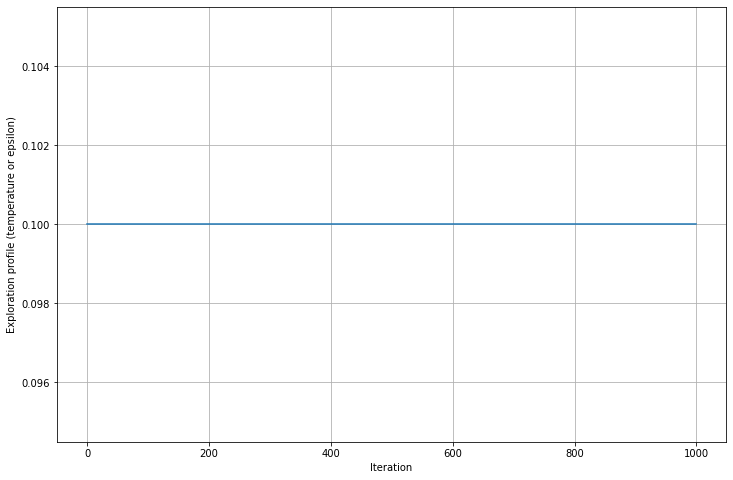

In [ ]:
exploration_policy='EpsilonGreedy' # 'EpsilonGreedy' or 'Softmax'
### Define exploration profile
initial_value = 0.1
fixed_value = True
num_iterations = 1000
exp_decay = np.exp(-np.log(5) / num_iterations * 6) # We compute the exponential decay in such a way the shape of the exploration profile does not depend on the number of iterations
if exploration_policy=='EpsilonGreedy': initial_value = min(1, initial_value)
if not fixed_value:
  exploration_profile = [initial_value * (exp_decay ** i) for i in range(num_iterations)]
  exploration_description = f'{initial_value}Decay'
else:
  exploration_profile = [initial_value for i in range(num_iterations)]
  exploration_description = f'{initial_value}Fixed'


### Plot exploration profile
plt.figure(figsize=(12,8))
plt.plot(exploration_profile)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Exploration profile (temperature or epsilon)')
plt.savefig('exploration_profile.png')
plt.show()

##Network update function

In [ ]:
def update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size):
        
    # Sample the data from the replay memory
    global batch
    batch = replay_mem.sample(batch_size)
    batch_size = len(batch)

    # Create tensors for each element of the batch
    states      = torch.tensor([s[0] for s in batch], dtype=torch.float32)
    actions     = torch.tensor([s[1] for s in batch], dtype=torch.int64)
    rewards     = torch.tensor([s[3] for s in batch], dtype=torch.float32)

    # Compute a mask of non-final states (all the elements where the next state is not None)
    non_final_next_states = torch.tensor([s[2] for s in batch if s[2] is not None], dtype=torch.float32) # the next state can be None if the game has ended
    non_final_mask = torch.tensor([s[2] is not None for s in batch], dtype=torch.bool)

    # Compute all the Q values (forward pass)
    policy_net.train()
    q_values = policy_net(states)
    # Select the proper Q value for the corresponding action taken Q(s_t, a)
    state_action_values = q_values.gather(1, actions.unsqueeze(1))

    # Compute the value function of the next states using the target network V(s_{t+1}) = max_a( Q_target(s_{t+1}, a)) )
    with torch.no_grad():
      target_net.eval()
      q_values_target = target_net(non_final_next_states)
    next_state_max_q_values = torch.zeros(batch_size)
    next_state_max_q_values[non_final_mask] = q_values_target.max(dim=1)[0]

    # Compute the expected Q values
    expected_state_action_values = rewards + (next_state_max_q_values * gamma)
    expected_state_action_values = expected_state_action_values.unsqueeze(1) # Set the required tensor shape

    # Compute the Huber loss
    loss = loss_fn(state_action_values, expected_state_action_values)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # Apply gradient clipping (clip all the gradients greater than 2 for training stability)
    nn.utils.clip_grad_norm_(policy_net.parameters(), 2)
    optimizer.step()

## Network: test exploration profile 

### Initialization

In [ ]:
# Set random seeds
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

### PARAMETERS
gamma = 0.97   # gamma parameter for the long term reward
replay_memory_capacity = 10000   # Replay memory capacity
lr = 1e-2   # Optimizer learning rate
target_net_update_steps = 10   # Number of episodes to wait before updating the target network
batch_size = 128   # Number of samples to take from the replay memory for each update
bad_state_penalty = 0   # Penalty to the reward when we are in a bad state (in this case when the pole falls down) 
min_samples_for_training = 1000   # Minimum samples in the replay memory to enable the training

In [ ]:
### Initialize the replay memory
replay_mem = ReplayMemory(replay_memory_capacity)    

### Initialize the policy network
path=f'nets_exploration_profile/net_{exploration_policy}_ExplorPar_{exploration_description}'
try:
  os.makedirs(path, exist_ok=True)
  policy_net=torch.load(os.path.join(path,'net_params.torch'))
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values
  train=False
except:
  policy_net = DQN(state_space_dim, action_space_dim)
  train=True

pd.DataFrame(exploration_profile, columns=['exploration profile']).to_csv(os.path.join(path,'exploration_prof.csv'),index=False)
os.replace('exploration_profile.png',os.path.join(path,'exploration_profile.png'))
### Initialize the target network with the same weights of the policy network
target_net = copy.deepcopy(policy_net)

### Initialize the optimizer
optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr) # The optimizer will update ONLY the parameters of the policy network

### Initialize the loss function (Huber loss)
loss_fn = nn.SmoothL1Loss()

### Training loop

In [ ]:
if train:
  # Initialize the Gym environment
  env = gym.make('CartPole-v1') 
  env.seed(0) # Set a random seed for the environment (reproducible results)

  # This is for creating the output video in Colab, not required outside Colab
  env = wrap_env(env, video_callable=lambda episode_id: episode_id % 100 == 0) # Save a video every 100 episodes

  scores=[]
  for episode_num, explor_param in enumerate(tqdm(exploration_profile)):

      # Reset the environment and get the initial state
      state = env.reset()
      # Reset the score. The final score will be the total amount of steps before the pole falls
      score = 0
      done = False

      # Go on until the pole falls off
      while not done:

        # Choose the action following the policy
        if exploration_policy=='EpsilonGreedy': action, q_values = choose_action_epsilon_greedy(policy_net, state, epsilon=explor_param)
        elif exploration_policy=='Softmax': action, q_values = choose_action_softmax(policy_net, state, temperature=explor_param)
        else: raise Exception('Wrong exploration policy')

        # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
        next_state, reward, done, info = env.step(action)

        # We apply a (linear) penalty when the cart is far from center
        pos_weight = 1
        reward = reward - pos_weight * np.abs(state[0]) 

        # Update the final score (+1 for each step)
        score += 1

        # Apply penalty for bad state
        if done: # if the pole has fallen down 
            reward += bad_state_penalty
            next_state = None

        # Update the replay memory
        replay_mem.push(state, action, next_state, reward)

        # Update the network
        if len(replay_mem) > min_samples_for_training: # we enable the training only if we have enough samples in the replay memory, otherwise the training will use the same samples too often
            update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size)

        # Visually render the environment (disable to speed up the training)
        env.render()

        # Set the current state for the next iteration
        state = next_state

      # Update the target network every target_net_update_steps episodes
      if episode_num % target_net_update_steps == 0:
          print('Updating target network...')
          target_net.load_state_dict(policy_net.state_dict()) # This will copy the weights of the policy network to the target network

      # Print the final score
      print(f"{exploration_policy} EPISODE: {episode_num + 1} - FINAL SCORE: {score} - Exploration Parameter: {explor_param}") # Print the final score

      scores.append(score)
      if np.mean(scores[-10:-1])>450:
        print('Early Stop')
        break

  torch.save(policy_net, os.path.join(path,'net_params.torch'))  
  pd.DataFrame(scores,columns=['scores']).to_csv(os.path.join(path,'scores.csv'),index=False)
  env.close()
  

In [ ]:
if train:
  # Display the videos, not required outside Colab
  show_videos()

### Compare train results

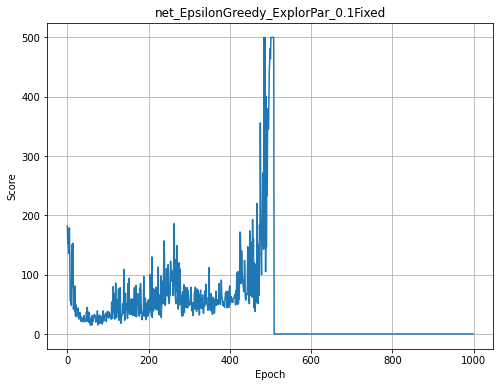

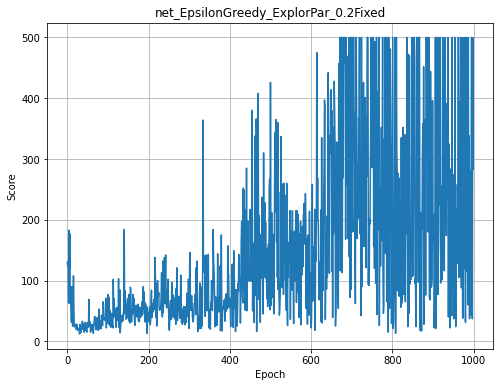

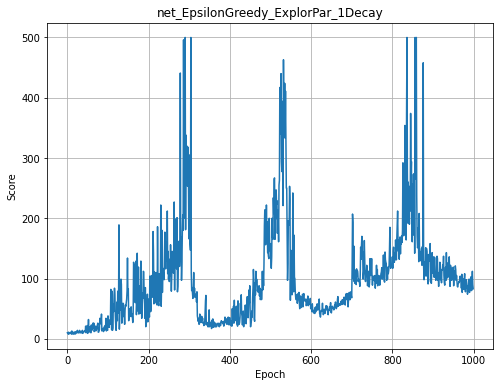

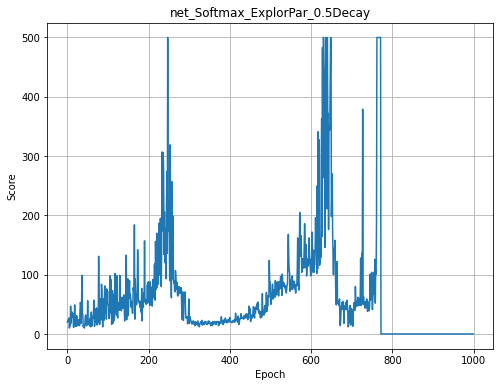

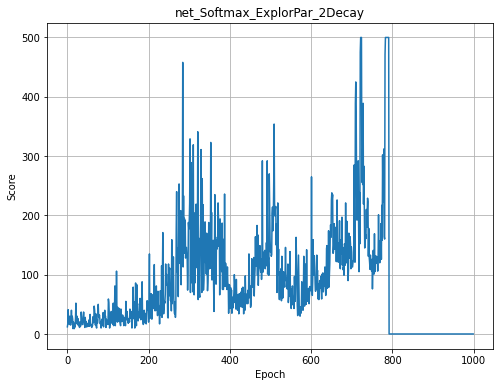

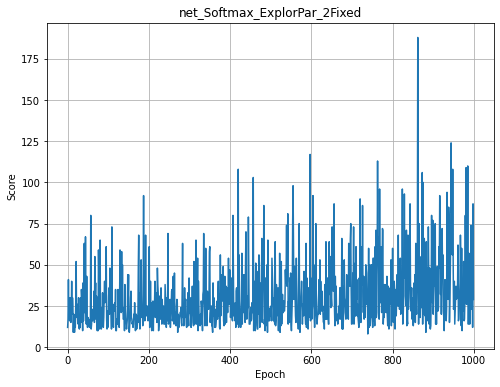

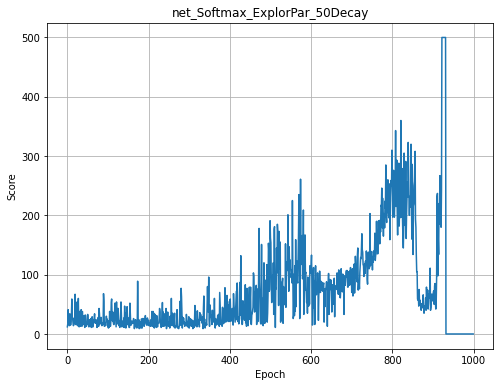

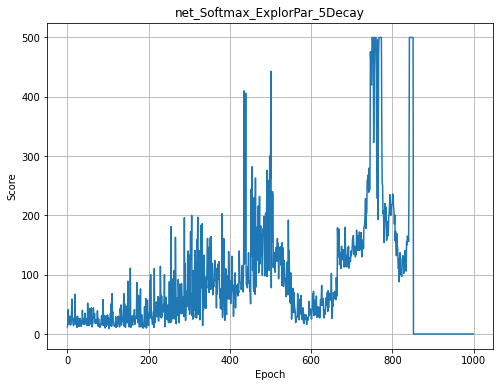

In [ ]:
folder='nets_exploration_profile'
for net_name in sorted(os.listdir(folder)):
  path=os.path.join(folder,net_name)
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values.squeeze()
  padding = np.zeros(num_iterations)
  padding[:scores.shape[0]]=scores
  plt.figure(figsize=(8,6))
  plt.title(net_name)
  plt.plot(padding)
  plt.grid()
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.show()


### Final test

In [ ]:
# Initialize the Gym environment
env = gym.make('CartPole-v1') 
env.seed(1) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True) # Save a video every episode

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    state = env.reset()
    # Reset the score. The final score will be the total amount of steps before the pole falls
    score = 0
    done = False
    # Go on until the pole falls off or the score reach 490
    while not done:
      # Choose the best action (temperature 0)
      action, q_values = choose_action_softmax(policy_net, state, temperature=0)
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      next_state, reward, done, info = env.step(action)
      # Visually render the environment
      env.render()
      # Update the final score (+1 for each step)
      score += reward 
      # Set the current state for the next iteration
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 
env.close()

Output streaming troncato alle ultime 5000 righe.
tensor([25.4729, 25.6343])
tensor([25.6211, 25.6191])
tensor([25.4626, 25.6281])
tensor([25.6106, 25.6167])
tensor([25.6411, 25.4858])
tensor([25.6187, 25.6317])
tensor([25.6535, 25.5056])
tensor([25.6233, 25.6441])
tensor([25.6628, 25.5234])
tensor([25.6231, 25.6531])
tensor([25.6676, 25.5382])
tensor([25.6166, 25.6573])
tensor([25.6664, 25.5484])
tensor([25.6018, 25.6548])
tensor([25.6569, 25.5522])
tensor([25.5758, 25.6429])
tensor([25.6358, 25.5465])
tensor([25.5344, 25.6180])
tensor([25.5988, 25.5274])
tensor([25.4724, 25.5749])
tensor([25.5397, 25.4890])
tensor([25.3823, 25.5067])
tensor([25.4501, 25.4233])
tensor([25.2540, 25.4036])
tensor([25.3186, 25.3195])
tensor([25.2965, 25.1503])
tensor([25.2210, 25.2443])
tensor([25.2116, 25.0869])
tensor([25.1136, 25.1569])
tensor([25.1157, 25.0104])
tensor([24.9971, 25.0586])
tensor([25.0094, 24.9220])
tensor([24.8709, 24.9493])
tensor([24.8920, 24.8216])
tensor([24.7336, 24.8281])
tenso

In [ ]:
# Display the videos, not required outside Colab
show_videos()


SHOWING VIDEO video/openaigym.video.1.7481.video000000.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000001.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000002.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000003.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000004.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000005.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000006.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000007.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000008.mp4



SHOWING VIDEO video/openaigym.video.1.7481.video000009.mp4


## Network: test hyperparameters 

### Initialization

In [ ]:
# Set random seeds
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

### PARAMETERS
gamma = 0.97   # gamma parameter for the long term reward
replay_memory_capacity = 10000   # Replay memory capacity
lr = 1e-3   # Optimizer learning rate
target_net_update_steps = 5   # Number of episodes to wait before updating the target network
batch_size = 128   # Number of samples to take from the replay memory for each update
bad_state_penalty = 0   # Penalty to the reward when we are in a bad state (in this case when the pole falls down) 
min_samples_for_training = 1000   # Minimum samples in the replay memory to enable the training
act=nn.Tanh()
opt='SGDM' #'SGD', 'SGDM', 'Adam'
pos_weight = 0.5

In [ ]:
### Initialize the replay memory
replay_mem = ReplayMemory(replay_memory_capacity)    

### Initialize the policy network
path=f'nets_hyperparameters/net_Best'
try:
  os.makedirs(path, exist_ok=True)
  policy_net=torch.load(os.path.join(path,'net_params.torch'))
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values
  train=False
except:
  policy_net = DQN(state_space_dim, action_space_dim, act=act)
  train=True

pd.DataFrame(exploration_profile, columns=['exploration profile']).to_csv(os.path.join(path,'exploration_prof.csv'),index=False)
### Initialize the target network with the same weights of the policy network
target_net = copy.deepcopy(policy_net)

### Initialize the optimizer
if opt=='SGD':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr) # The optimizer will update ONLY the parameters of the policy network
if opt=='SGDM':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr, momentum=0.9)
if opt=='Adam':
  optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

### Initialize the loss function (Huber loss)
loss_fn = nn.SmoothL1Loss()

### Training loop

In [ ]:
if train:
  # Initialize the Gym environment
  env = gym.make('CartPole-v1') 
  env.seed(0) # Set a random seed for the environment (reproducible results)

  # This is for creating the output video in Colab, not required outside Colab
  env = wrap_env(env, video_callable=lambda episode_id: episode_id % 100 == 0) # Save a video every 100 episodes

  scores=[]
  for episode_num, explor_param in enumerate(tqdm(exploration_profile)):

      # Reset the environment and get the initial state
      state = env.reset()
      # Reset the score. The final score will be the total amount of steps before the pole falls
      score = 0
      done = False

      # Go on until the pole falls off
      while not done:

        # Choose the action following the policy
        if exploration_policy=='EpsilonGreedy': action, q_values = choose_action_epsilon_greedy(policy_net, state, epsilon=explor_param)
        elif exploration_policy=='Softmax': action, q_values = choose_action_softmax(policy_net, state, temperature=explor_param)
        else: raise Exception('Wrong exploration policy')

        # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
        next_state, reward, done, info = env.step(action)

        # We apply a (linear) penalty when the cart is far from center
        reward = reward - pos_weight * np.abs(state[0]) 

        # Update the final score (+1 for each step)
        score += 1

        # Apply penalty for bad state
        if done: # if the pole has fallen down 
            reward += bad_state_penalty
            next_state = None

        # Update the replay memory
        replay_mem.push(state, action, next_state, reward)

        # Update the network
        if len(replay_mem) > min_samples_for_training: # we enable the training only if we have enough samples in the replay memory, otherwise the training will use the same samples too often
            update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size)

        # Visually render the environment (disable to speed up the training)
        env.render()

        # Set the current state for the next iteration
        state = next_state

      # Update the target network every target_net_update_steps episodes
      if episode_num % target_net_update_steps == 0:
          print('Updating target network...')
          target_net.load_state_dict(policy_net.state_dict()) # This will copy the weights of the policy network to the target network

      # Print the final score
      print(f"{exploration_policy} EPISODE: {episode_num + 1} - FINAL SCORE: {score} - Exploration Parameter: {explor_param}") # Print the final score

      scores.append(score)
      if np.mean(scores[-10:-1])>450:
        print('Early Stop')
        break

  torch.save(policy_net, os.path.join(path,'net_params.torch'))  
  pd.DataFrame(scores,columns=['scores']).to_csv(os.path.join(path,'scores.csv'),index=False)
  env.close()
  

In [ ]:
if train:
  # Display the videos, not required outside Colab
  show_videos()

### Compare train results

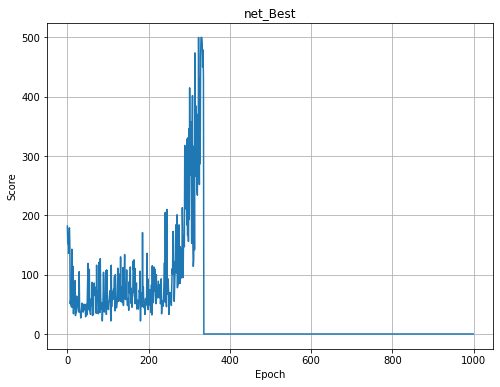

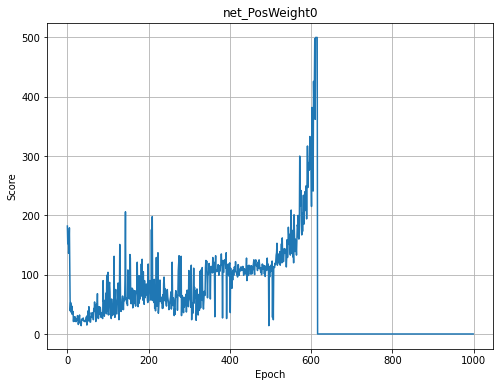

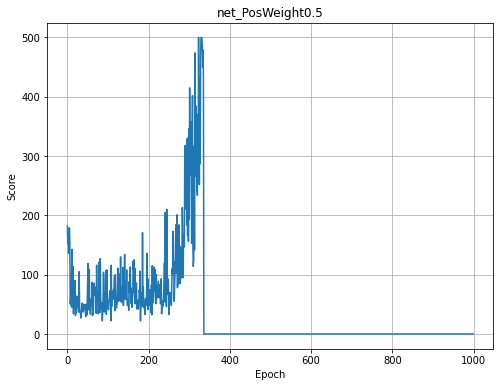

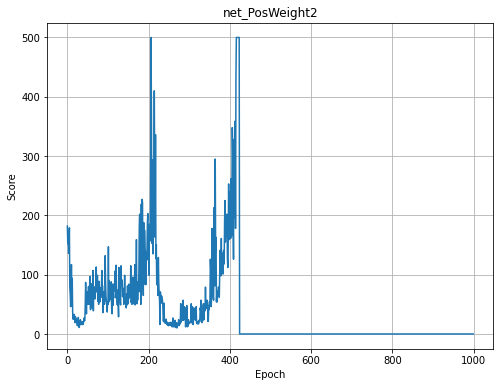

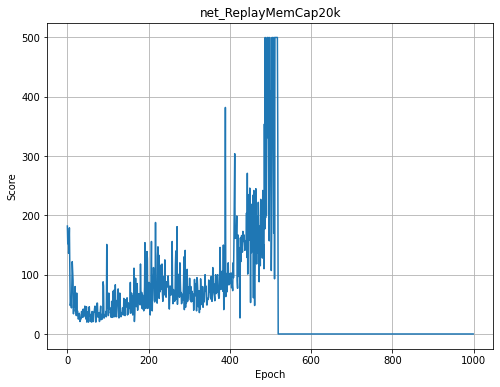

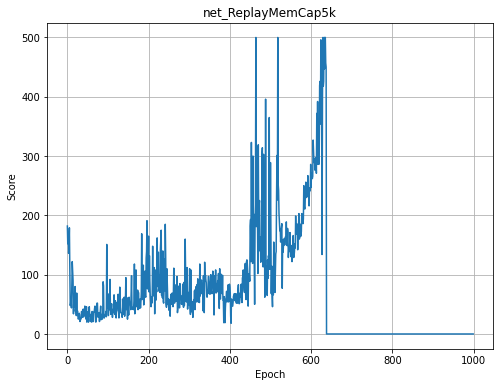

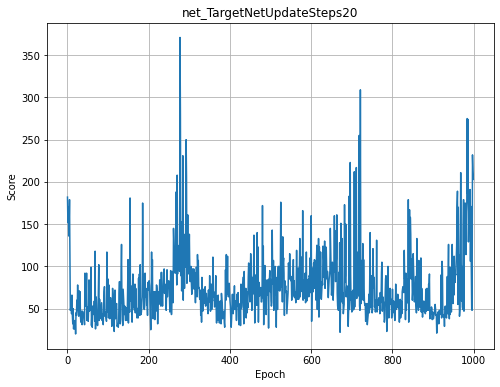

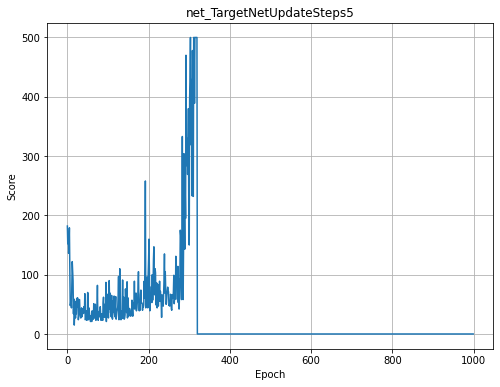

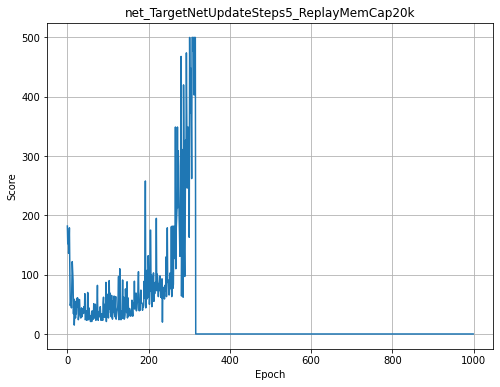

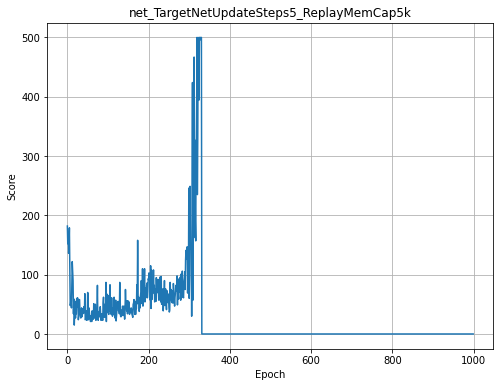

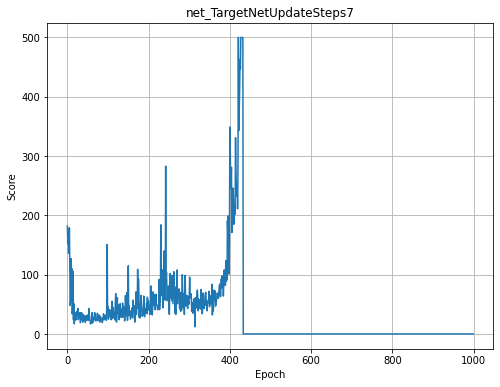

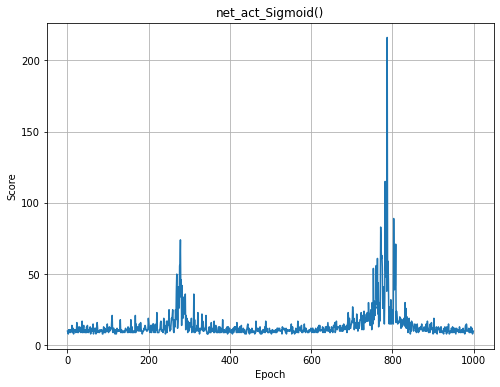

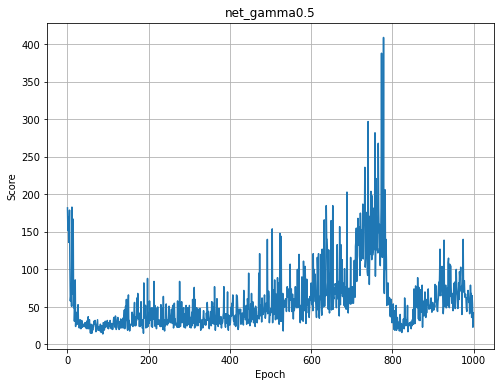

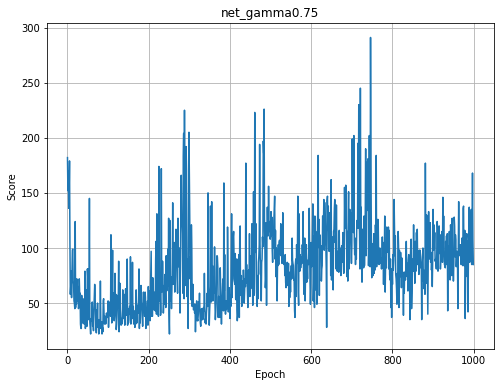

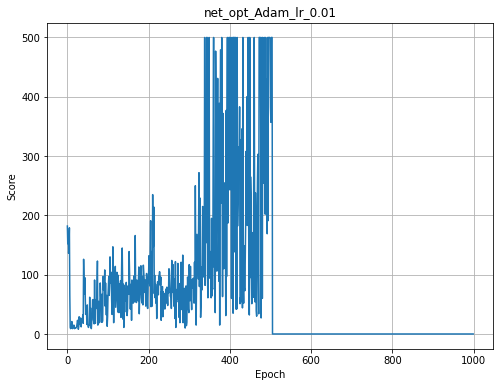

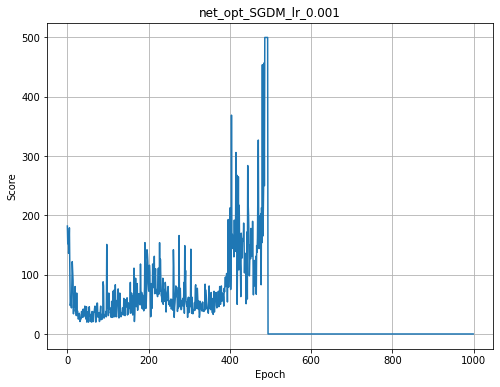

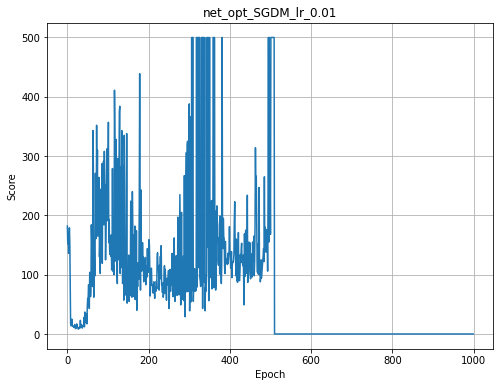

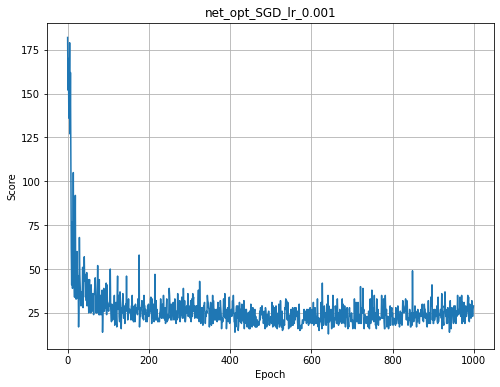

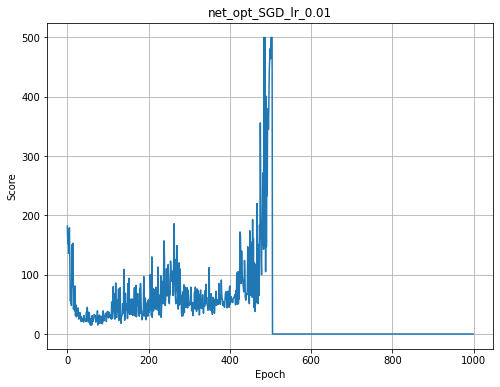

In [ ]:
folder='nets_hyperparameters'
for net_name in sorted(os.listdir(folder)):
  path=os.path.join(folder,net_name)
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values.squeeze()
  padding = np.zeros(num_iterations)
  padding[:scores.shape[0]]=scores
  plt.figure(figsize=(8,6))
  plt.title(net_name)
  plt.plot(padding)
  plt.grid()
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.show()


### Final test

In [ ]:
# Initialize the Gym environment
env = gym.make('CartPole-v1') 
env.seed(1) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True) # Save a video every episode

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    state = env.reset()
    # Reset the score. The final score will be the total amount of steps before the pole falls
    score = 0
    done = False
    # Go on until the pole falls off or the score reach 490
    while not done:
      # Choose the best action (temperature 0)
      action, q_values = choose_action_softmax(policy_net, state, temperature=0)
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      next_state, reward, done, info = env.step(action)
      # Visually render the environment
      env.render()
      # Update the final score (+1 for each step)
      score += reward 
      # Set the current state for the next iteration
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 
env.close()

In [ ]:
# Display the videos, not required outside Colab
show_videos()


SHOWING VIDEO video/openaigym.video.2.7481.video000000.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000001.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000002.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000003.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000004.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000005.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000006.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000007.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000008.mp4



SHOWING VIDEO video/openaigym.video.2.7481.video000009.mp4


# CNN

## Gym environment initialization

In [ ]:
# Initialize the Gym environment
env = gym.make('CartPole-v1') 
env.seed(0) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True)

o_state = env.reset()
img = env.render(mode='rgb_array')

env.close()

## Images used for training

In [ ]:
def transform_img(img, compression = 4):  
  transform = transforms.Compose([transforms.ToTensor(),transforms.Grayscale(),transforms.Resize((400//compression,600//compression))])
  img_sample = transform(img.copy())[:,150//compression:350//compression,150//compression:450//compression]
  return img_sample 


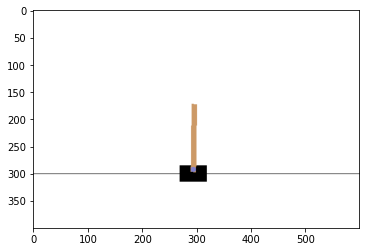

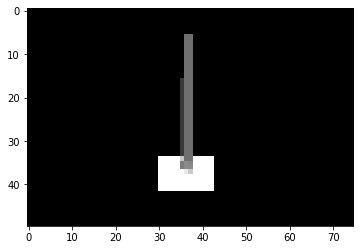

In [ ]:
plt.imshow(img)
plt.show()
img_sample = transform_img(img)
plt.imshow(img_sample.view(50,75),cmap='Greys')
plt.show()

## Network definition

In [ ]:
class DQN_CNN(nn.Module):
    def __init__(self, action_space_dim, act=nn.Tanh(), num_channels=32, n_fcl=200,  dropout_p=0.3, reduced=False):

        super().__init__()
        self.reduced=reduced        
        self.act=act

        self.cnn1=nn.Conv2d(in_channels=1, out_channels=num_channels, kernel_size=5, stride=2, padding=0)
        self.cnn2=nn.Conv2d(in_channels=num_channels, out_channels=num_channels, kernel_size=5, stride=2, padding=0)
        if not self.reduced:
          self.cnn3=nn.Conv2d(in_channels=num_channels, out_channels=num_channels, kernel_size=5, stride=2, padding=0)

        if not self.reduced:      
          self.fc1 = nn.Linear(num_channels * 18, n_fcl) 
          self.fc2 = nn.Linear(n_fcl, action_space_dim)
        else:
          self.fc1 = nn.Linear(num_channels * 160, action_space_dim)

        self.dropout = nn.Dropout(dropout_p)
    
    def forward(self, x):
      #Convolutional
      relu = nn.ReLU()
      out = x            
      out = self.cnn1(out)
      out = relu(out)
      out = self.cnn2(out)
      out = relu(out)
      if not self.reduced:
        out = self.cnn3(out)
        out = relu(out)

      #Flatten
      out = out.view(out.size(0), -1)
      
      #Dense
      out = self.fc1(out)
      out = self.act(out)
      if not self.reduced:
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.act(out)
        
      return out

In [ ]:
# Define an example network
action_space_dim=2
net = DQN_CNN(action_space_dim=action_space_dim)
state = img_sample.view(-1,1,img_sample.size()[1],img_sample.size()[2])
print(net(img_sample.view(-1,1,img_sample.size()[1],img_sample.size()[2])))
print(choose_action_epsilon_greedy(net.cpu(), state.numpy(), epsilon=0.1))

tensor([[ 0.0752, -0.0473]], grad_fn=<TanhBackward>)
(0, array([[ 0.08714411, -0.03525879]], dtype=float32))


## CNN update function

In [ ]:
def CNN_update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size):
        
    # Sample the data from the replay memory
    batch = replay_mem.sample(batch_size)
    batch_size = len(batch)

    # Create tensors for each element of the batch
    states      = torch.stack([s[0] for s in batch]).to(device)
    actions     = torch.tensor([s[1] for s in batch], dtype=torch.int64).to(device)
    rewards     = torch.tensor([s[3] for s in batch], dtype=torch.float32).to(device)

    # Compute a mask of non-final states (all the elements where the next state is not None)
    non_final_next_states = torch.stack([s[2] for s in batch if s[2] is not None]).to(device) # the next state can be None if the game has ended
    non_final_mask = torch.tensor([s[2] is not None for s in batch], dtype=torch.bool).to(device)

    # Compute all the Q values (forward pass)
    policy_net.to(device)
    policy_net.train()
    q_values = policy_net(states.to(device))
    # Select the proper Q value for the corresponding action taken Q(s_t, a)
    state_action_values = q_values.gather(1, actions.unsqueeze(1))

    # Compute the value function of the next states using the target network V(s_{t+1}) = max_a( Q_target(s_{t+1}, a)) )
    with torch.no_grad():
      target_net.to(device)
      target_net.eval()
      q_values_target = target_net(non_final_next_states.to(device))
    next_state_max_q_values = torch.zeros(batch_size).to(device)
    next_state_max_q_values[non_final_mask] = q_values_target.max(dim=1)[0]

    # Compute the expected Q values
    expected_state_action_values = rewards + (next_state_max_q_values * gamma)
    expected_state_action_values = expected_state_action_values.unsqueeze(1) # Set the required tensor shape

    # Compute the Huber loss
    loss = loss_fn(state_action_values, expected_state_action_values)

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # Apply gradient clipping (clip all the gradients greater than 2 for training stability)
    nn.utils.clip_grad_norm_(policy_net.parameters(), 2)
    optimizer.step()

## Exploration profile

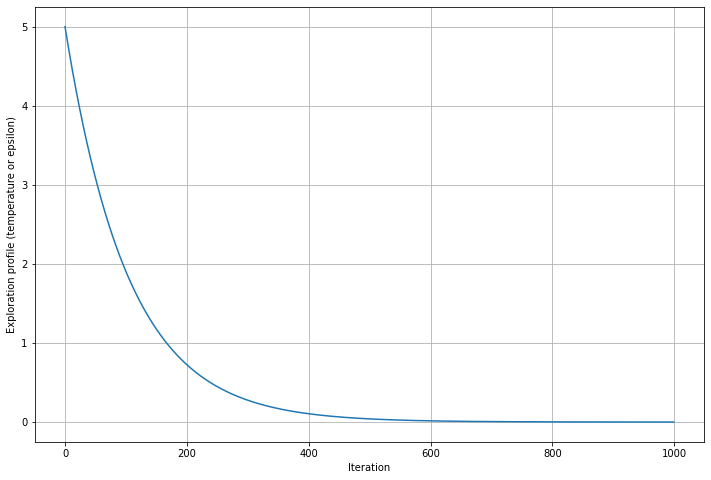

In [ ]:
exploration_policy='Softmax' # 'EpsilonGreedy' or 'Softmax'
### Define exploration profile
initial_value = 5
fixed_value = False
num_iterations = 1000
exp_decay = np.exp(-np.log(5) / num_iterations * 6) # We compute the exponential decay in such a way the shape of the exploration profile does not depend on the number of iterations
if exploration_policy=='EpsilonGreedy': initial_value = min(1, initial_value)
if not fixed_value:
  exploration_profile = [initial_value * (exp_decay ** i) for i in range(num_iterations)]
  exploration_description = f'{initial_value}Decay'
else:
  exploration_profile = [initial_value for i in range(num_iterations)]
  exploration_description = f'{initial_value}Fixed'


### Plot exploration profile
plt.figure(figsize=(12,8))
plt.plot(exploration_profile)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Exploration profile (temperature or epsilon)')
plt.savefig('exploration_profile.png')
plt.show()

## Initialization

In [ ]:
# Set random seeds
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

### PARAMETERS
gamma = 0.97   # gamma parameter for the long term reward
replay_memory_capacity = 50000   # Replay memory capacity
lr = 1e-3   # Optimizer learning rate
target_net_update_steps = 50   # Number of episodes to wait before updating the target network
batch_size = 128   # Number of samples to take from the replay memory for each update
bad_state_penalty = 0   # Penalty to the reward when we are in a bad state (in this case when the pole falls down) 
min_samples_for_training = 5000   # Minimum samples in the replay memory to enable the training
act = nn.Tanh()
opt='Adam' #'SGD', 'SGDM', 'Adam'
pos_weight = 1

#Net parameters
num_channels=16
n_fcl=100
dropout_p=0.3

In [ ]:
### Initialize the replay memory
replay_mem = ReplayMemory(replay_memory_capacity)    

### Initialize the policy network
path=f'nets_CNN/net_PosWeight'
try:
  os.makedirs(path, exist_ok=True)
  policy_net=torch.load(os.path.join(path,'net_params.torch'))
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values
  train=False
except:
  policy_net = DQN_CNN(action_space_dim=action_space_dim, act=act, num_channels=num_channels, n_fcl=n_fcl, dropout_p=dropout_p, reduced=True)
  train=True

pd.DataFrame(exploration_profile, columns=['exploration profile']).to_csv(os.path.join(path,'exploration_prof.csv'),index=False)
### Initialize the target network with the same weights of the policy network
target_net = copy.deepcopy(policy_net)

### Initialize the optimizer
if opt=='SGD':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr) # The optimizer will update ONLY the parameters of the policy network
if opt=='SGDM':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr, momentum=0.9)
if opt=='Adam':
  optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

### Initialize the loss function (Huber loss)
loss_fn = nn.SmoothL1Loss()

## Training loop

In [ ]:
if train:
  # Initialize the Gym environment
  env = gym.make('CartPole-v1') 
  env.seed(0) # Set a random seed for the environment (reproducible results)

  # This is for creating the output video in Colab, not required outside Colab
  env = wrap_env(env, video_callable=lambda episode_id: episode_id % 100 == 0) # Save a video every 100 episodes

  scores=[]
  for episode_num, explor_param in enumerate(tqdm(exploration_profile)):

      # Reset the environment and get the initial state
      o_state = env.reset()
      state = transform_img(env.render(mode='rgb_array'))
      # Reset the score. The final score will be the total amount of steps before the pole falls
      score = 0
      done = False

      # Go on until the pole falls off
      while not done:

        # Choose the action following the policy
        if exploration_policy=='EpsilonGreedy': action, q_values = choose_action_epsilon_greedy(policy_net.cpu(), state.view(-1,1,state.size()[1],state.size()[2]).numpy(), epsilon=explor_param)
        elif exploration_policy=='Softmax': action, q_values = choose_action_softmax(policy_net.cpu(), state.view(-1,1,state.size()[1],state.size()[2]).numpy(), temperature=explor_param)
        else: raise Exception('Wrong exploration policy')

        # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
        o_next_state, reward, done, info = env.step(action)        
        next_state = transform_img(env.render(mode='rgb_array'))

        # We apply a (linear) penalty when the cart is far from center
        reward = reward - pos_weight * np.abs(o_state[0]) 

        # Update the final score (+1 for each step)
        score += 1

        # Apply penalty for bad state
        if done: # if the pole has fallen down 
            reward += bad_state_penalty
            next_state = None

        # Update the replay memory
        replay_mem.push(state, action, next_state, reward)

        # Update the network
        if len(replay_mem) > min_samples_for_training: # we enable the training only if we have enough samples in the replay memory, otherwise the training will use the same samples too often
            CNN_update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size)

        # Set the current state for the next iteration
        o_state = o_next_state
        state = next_state


      # Update the target network every target_net_update_steps episodes
      if episode_num % target_net_update_steps == 0:
          print('Updating target network...')
          target_net.load_state_dict(policy_net.state_dict()) # This will copy the weights of the policy network to the target network

      # Print the final score
      print(f"{exploration_policy} EPISODE: {episode_num + 1} - FINAL SCORE: {score} - Exploration Parameter: {explor_param}") # Print the final score

      scores.append(score)
      if np.mean(scores[-10:-1])>450:
        print('Early Stop')
        break

  torch.save(policy_net, os.path.join(path,'net_params.torch'))  
  pd.DataFrame(scores,columns=['scores']).to_csv(os.path.join(path,'scores.csv'),index=False)
  env.close()
  

Updating target network...
Softmax EPISODE: 1 - FINAL SCORE: 12 - Exploration Parameter: 5.0
Softmax EPISODE: 2 - FINAL SCORE: 17 - Exploration Parameter: 4.951949240166454


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Softmax EPISODE: 3 - FINAL SCORE: 41 - Exploration Parameter: 4.904360255437024
Softmax EPISODE: 4 - FINAL SCORE: 19 - Exploration Parameter: 4.857228608082785
Softmax EPISODE: 5 - FINAL SCORE: 24 - Exploration Parameter: 4.810549903022062
Softmax EPISODE: 6 - FINAL SCORE: 16 - Exploration Parameter: 4.764319787410582
Softmax EPISODE: 7 - FINAL SCORE: 30 - Exploration Parameter: 4.7185339502355665
Softmax EPISODE: 8 - FINAL SCORE: 29 - Exploration Parameter: 4.673188121913726
Softmax EPISODE: 9 - FINAL SCORE: 15 - Exploration Parameter: 4.628278073893115
Softmax EPISODE: 10 - FINAL SCORE: 21 - Exploration Parameter: 4.583799618258813
Softmax EPISODE: 11 - FINAL SCORE: 31 - Exploration Parameter: 4.5397486073424025
Softmax EPISODE: 12 - FINAL SCORE: 59 - Exploration Parameter: 4.4961209333351855
Softmax EPISODE: 13 - FINAL SCORE: 29 - Exploration Parameter: 4.452912527905132
Softmax EPISODE: 14 - FINAL SCORE: 26 - Exploration Parameter: 4.4101193618175
Softmax EPISODE: 15 - FINAL SCORE:

In [ ]:
if train:
  # Display the videos, not required outside Colab
  show_videos()


SHOWING VIDEO video/openaigym.video.6.61.video000000.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000100.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000200.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000300.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000400.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000500.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000600.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000700.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000800.mp4



SHOWING VIDEO video/openaigym.video.6.61.video000900.mp4


## Compare train results

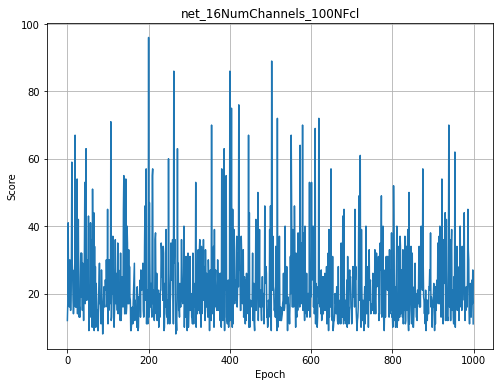

Mean Score:22.62


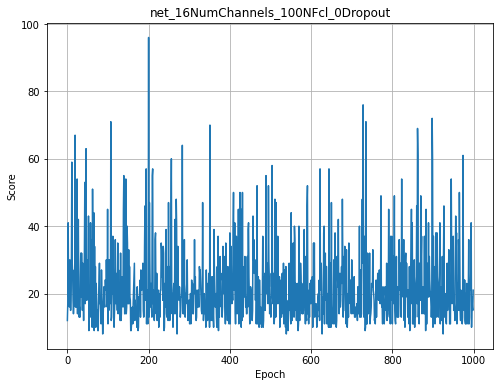

Mean Score:22.157


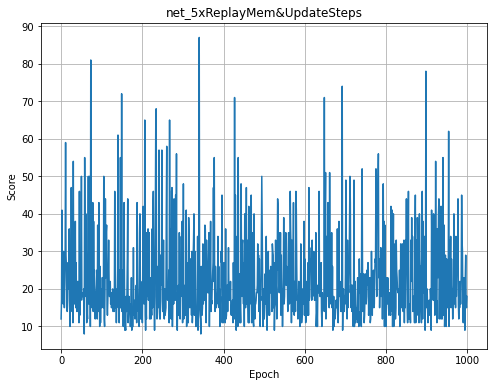

Mean Score:22.62


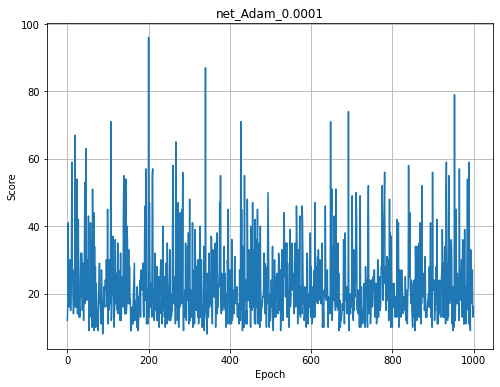

Mean Score:22.518


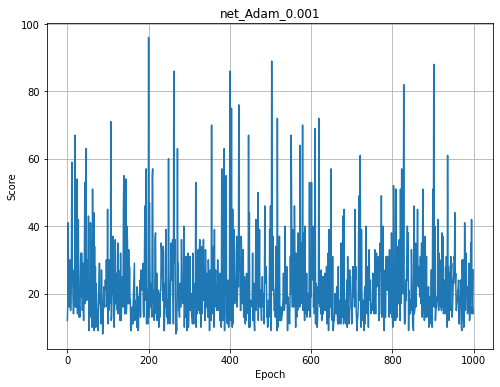

Mean Score:22.868


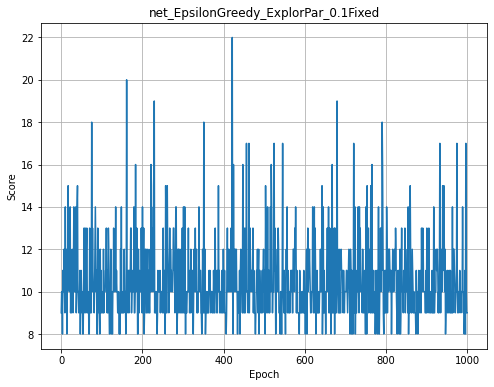

Mean Score:10.492


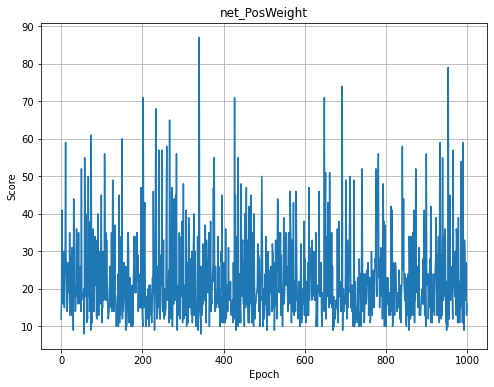

Mean Score:22.518


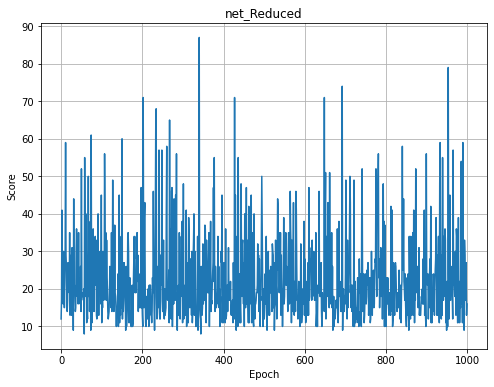

Mean Score:22.518


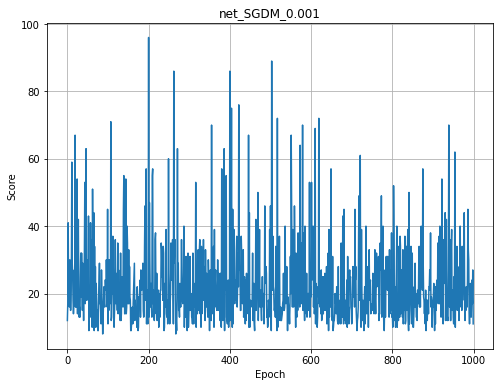

Mean Score:22.62


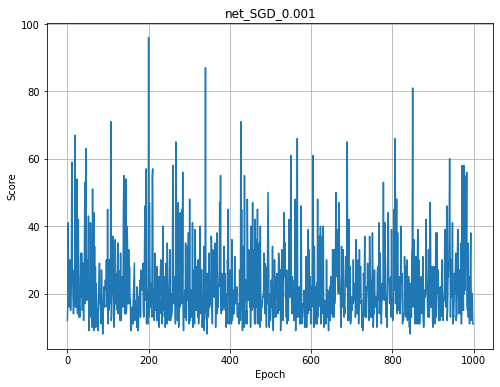

Mean Score:22.364


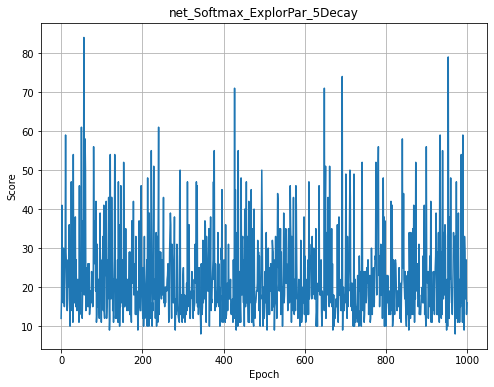

Mean Score:22.518


In [ ]:
folder='nets_CNN'
for net_name in sorted(os.listdir(folder)):
  path=os.path.join(folder,net_name)
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values.squeeze()
  padding = np.zeros(num_iterations)
  padding[:scores.shape[0]]=scores
  plt.figure(figsize=(8,6))
  plt.title(net_name)
  plt.plot(padding)
  plt.grid()
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.show()
  print(f'Mean Score:{scores.mean()}')


## Final test

In [ ]:
# Initialize the Gym environment
env = gym.make('CartPole-v1') 
env.seed(1) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True) # Save a video every episode

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    o_state = env.reset()
    state = transform_img(env.render(mode='rgb_array'))
    # Reset the score. The final score will be the total amount of steps before the pole falls
    score = 0
    done = False
    # Go on until the pole falls off or the score reach 490
    while not done:
      # Choose the best action (temperature 0)
      action, q_values = choose_action_softmax(policy_net.cpu(), state.view(-1,1,state.size()[1],state.size()[2]).numpy(), temperature=0)
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      o_next_state, reward, done, info = env.step(action)        
      next_state = transform_img(env.render(mode='rgb_array'))
      # Update the final score (+1 for each step)
      score += reward 
      # Set the current state for the next iteration
      o_state = o_next_state
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 
env.close()

EPISODE 1 - FINAL SCORE: 10.0
EPISODE 2 - FINAL SCORE: 10.0
EPISODE 3 - FINAL SCORE: 8.0
EPISODE 4 - FINAL SCORE: 8.0
EPISODE 5 - FINAL SCORE: 8.0
EPISODE 6 - FINAL SCORE: 9.0
EPISODE 7 - FINAL SCORE: 10.0
EPISODE 8 - FINAL SCORE: 8.0
EPISODE 9 - FINAL SCORE: 9.0
EPISODE 10 - FINAL SCORE: 9.0


In [ ]:
# Display the videos, not required outside Colab
show_videos()


SHOWING VIDEO video/openaigym.video.7.61.video000000.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000001.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000002.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000003.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000004.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000005.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000006.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000007.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000008.mp4



SHOWING VIDEO video/openaigym.video.7.61.video000009.mp4


#MountainCar-v0 environment

### Random agent

In [ ]:
# Initialize the Gym environment
env = gym.make('MountainCar-v0') 
env.seed(0) # Set a random seed for the environment (reproducible results)

# Get the shapes of the state space (observation_space) and action space (action_space)
state_space_dim = env.observation_space.shape[0]
action_space_dim = env.action_space.n

print(f"STATE SPACE SIZE: {state_space_dim}")
print(f"ACTION SPACE SIZE: {action_space_dim}")

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True)

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    state = env.reset()
    # Reset the score. The final score will be the total amount of steps before the pole falls
    score = 200
    done = False
    # Go on until the pole falls off or the score reach 490
    while not done:
      # Choose a random action
      action = random.choice([0, 1, 2])
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      next_state, reward, done, info = env.step(action)
      # Visually render the environment (optional, comment this line to speed up the simulation)
      env.render()
      # Update the final score (+1 for each step)
      score += reward 
      # Set the current state for the next iteration
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 

env.close()


STATE SPACE SIZE: 2
ACTION SPACE SIZE: 3
EPISODE 1 - FINAL SCORE: 0.0
EPISODE 2 - FINAL SCORE: 0.0
EPISODE 3 - FINAL SCORE: 0.0
EPISODE 4 - FINAL SCORE: 0.0
EPISODE 5 - FINAL SCORE: 0.0
EPISODE 6 - FINAL SCORE: 0.0
EPISODE 7 - FINAL SCORE: 0.0
EPISODE 8 - FINAL SCORE: 0.0
EPISODE 9 - FINAL SCORE: 0.0
EPISODE 10 - FINAL SCORE: 0.0


In [ ]:
# Display the videos, not required outside Colab
show_videos()


SHOWING VIDEO video/openaigym.video.3.61.video000000.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000001.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000002.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000003.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000004.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000005.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000006.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000007.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000008.mp4



SHOWING VIDEO video/openaigym.video.3.61.video000009.mp4


### Network definition

In [ ]:
# Define an example network
net = DQN(state_space_dim=2, action_space_dim=3)

In [ ]:
# Test if it works as expected
state = (-0.5, 0)
epsilon = 0.5
chosen_action, q_values = choose_action_epsilon_greedy(net, state, epsilon)

print(f"ACTION: {chosen_action}")
print(f"Q-VALUES: {q_values}")

ACTION: 0
Q-VALUES: [-0.09393873  0.2703889   0.06623135]


### Exploration profile

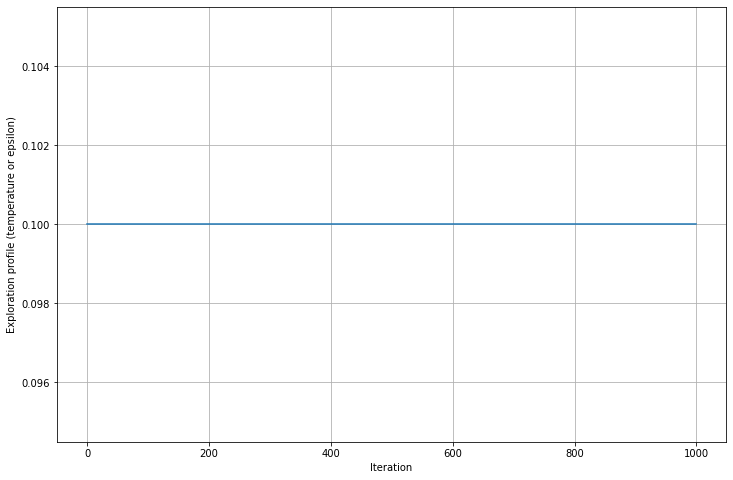

In [ ]:
exploration_policy='EpsilonGreedy' # 'EpsilonGreedy' or 'Softmax'
### Define exploration profile
initial_value = 0.1
fixed_value = True
num_iterations = 1000
exp_decay = np.exp(-np.log(5) / num_iterations * 6) # We compute the exponential decay in such a way the shape of the exploration profile does not depend on the number of iterations
if exploration_policy=='EpsilonGreedy': initial_value = min(1, initial_value)
if not fixed_value:
  exploration_profile = [initial_value * (exp_decay ** i) for i in range(num_iterations)]
  exploration_description = f'{initial_value}Decay'
else:
  exploration_profile = [initial_value for i in range(num_iterations)]
  exploration_description = f'{initial_value}Fixed'


### Plot exploration profile
plt.figure(figsize=(12,8))
plt.plot(exploration_profile)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Exploration profile (temperature or epsilon)')
plt.savefig('exploration_profile.png')
plt.show()

## Network test

### Initialization

In [ ]:
# Set random seeds
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

### PARAMETERS
gamma = 0.97   # gamma parameter for the long term reward
replay_memory_capacity = 10000   # Replay memory capacity
lr = 1e-3   # Optimizer learning rate
target_net_update_steps = 5   # Number of episodes to wait before updating the target network
batch_size = 128   # Number of samples to take from the replay memory for each update
bad_state_penalty = 0   # Penalty to the reward when we are in a bad state (in this case when the pole falls down) 
min_samples_for_training = 1000   # Minimum samples in the replay memory to enable the training
act=nn.Tanh()
opt='SGDM' #'SGD', 'SGDM', 'Adam'

In [ ]:
### Initialize the replay memory
replay_mem = ReplayMemory(replay_memory_capacity)    

### Initialize the policy network
path=f'nets_MountainCar/net_IntermediateGoalRewards0.2TimeDecay'
try:
  os.makedirs(path, exist_ok=True)
  policy_net=torch.load(os.path.join(path,'net_params.torch'))
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values
  train=False
except:
  policy_net = DQN(state_space_dim, action_space_dim, act=act)
  train=True

pd.DataFrame(exploration_profile, columns=['exploration profile']).to_csv(os.path.join(path,'exploration_prof.csv'),index=False)
### Initialize the target network with the same weights of the policy network
target_net = copy.deepcopy(policy_net)

### Initialize the optimizer
if opt=='SGD':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr) # The optimizer will update ONLY the parameters of the policy network
if opt=='SGDM':
  optimizer = torch.optim.SGD(policy_net.parameters(), lr=lr, momentum=0.9)
if opt=='Adam':
  optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

### Initialize the loss function (Huber loss)
loss_fn = nn.SmoothL1Loss()

### Training loop

In [ ]:
if train:
  # Initialize the Gym environment
  env = gym.make('MountainCar-v0') 
  env.seed(0) # Set a random seed for the environment (reproducible results)

  # This is for creating the output video in Colab, not required outside Colab
  env = wrap_env(env, video_callable=lambda episode_id: episode_id % 100 == 0) # Save a video every 100 episodes

  scores=[]
  for episode_num, explor_param in enumerate(tqdm(exploration_profile)):

      # Reset the environment and get the initial state
      state = env.reset()
      # Reset the score. The final score will be the total amount of steps before the pole falls
      score = 200
      done = False

      # Go on until the pole falls off
      while not done:

        # Choose the action following the policy
        if exploration_policy=='EpsilonGreedy': action, q_values = choose_action_epsilon_greedy(policy_net, state, epsilon=explor_param)
        elif exploration_policy=='Softmax': action, q_values = choose_action_softmax(policy_net, state, temperature=explor_param)
        else: raise Exception('Wrong exploration policy')

        # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
        next_state, reward, done, info = env.step(action)

        reward = (50*(reward+1) + np.abs(state[0]+0.5) + (state[0]+0.5>0)*50*(state[0]+0.5)//10)*(score/200)

        # Update the final score (-1 for each step)
        score += -1

        # Apply penalty for bad state
        if done: # if the pole has fallen down 
            reward += bad_state_penalty
            next_state = None

        # Update the replay memory
        replay_mem.push(state, action, next_state, reward)

        # Update the network
        if len(replay_mem) > min_samples_for_training: # we enable the training only if we have enough samples in the replay memory, otherwise the training will use the same samples too often
            update_step(policy_net, target_net, replay_mem, gamma, optimizer, loss_fn, batch_size)

        # Visually render the environment (disable to speed up the training)
        env.render()

        # Set the current state for the next iteration
        state = next_state

      # Update the target network every target_net_update_steps episodes
      if episode_num % target_net_update_steps == 0:
          print('Updating target network...')
          target_net.load_state_dict(policy_net.state_dict()) # This will copy the weights of the policy network to the target network

      # Print the final score
      print(f"{exploration_policy} EPISODE: {episode_num + 1} - FINAL SCORE: {score} - Exploration Parameter: {explor_param}") # Print the final score

      scores.append(score)
      if np.mean(scores[-10:-1])>160:
        print('Early Stop')
        break

  torch.save(policy_net, os.path.join(path,'net_params.torch'))  
  pd.DataFrame(scores,columns=['scores']).to_csv(os.path.join(path,'scores.csv'),index=False)
  env.close()
  

Updating target network...
EpsilonGreedy EPISODE: 1 - FINAL SCORE: 0 - Exploration Parameter: 0.1


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


EpsilonGreedy EPISODE: 2 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 3 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 4 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 5 - FINAL SCORE: 0 - Exploration Parameter: 0.1
Updating target network...
EpsilonGreedy EPISODE: 6 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 7 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 8 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 9 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 10 - FINAL SCORE: 0 - Exploration Parameter: 0.1
Updating target network...
EpsilonGreedy EPISODE: 11 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 12 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 13 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPISODE: 14 - FINAL SCORE: 0 - Exploration Parameter: 0.1
EpsilonGreedy EPIS

In [ ]:
if train:
  # Display the videos, not required outside Colab
  show_videos()


SHOWING VIDEO video/openaigym.video.12.61.video000000.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000100.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000200.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000300.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000400.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000500.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000600.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000700.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000800.mp4



SHOWING VIDEO video/openaigym.video.12.61.video000900.mp4


### Compare train results

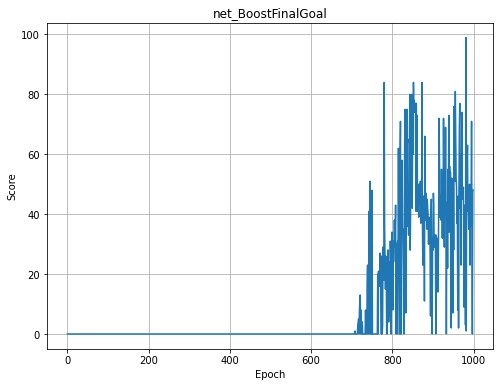

Mean Score:9.338


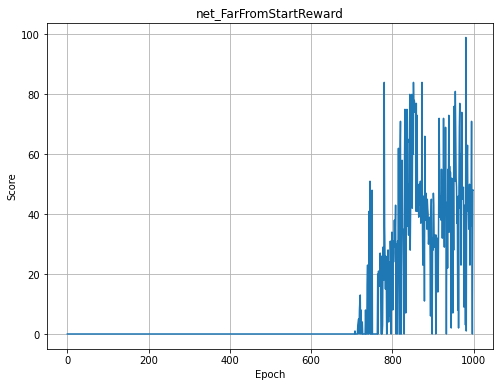

Mean Score:9.338


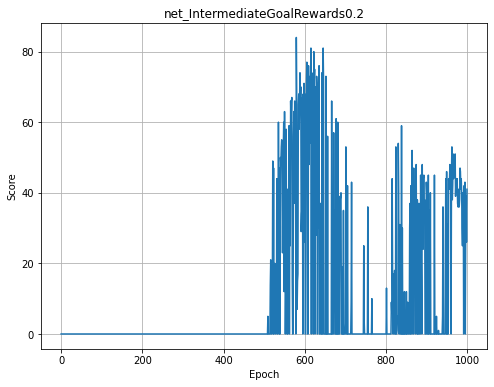

Mean Score:9.572


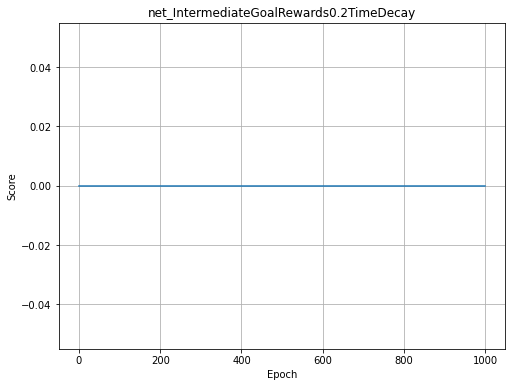

Mean Score:0.0


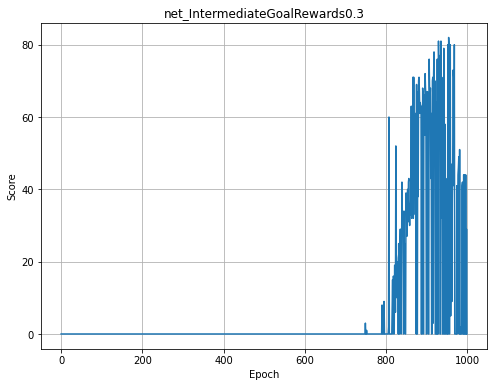

Mean Score:6.243


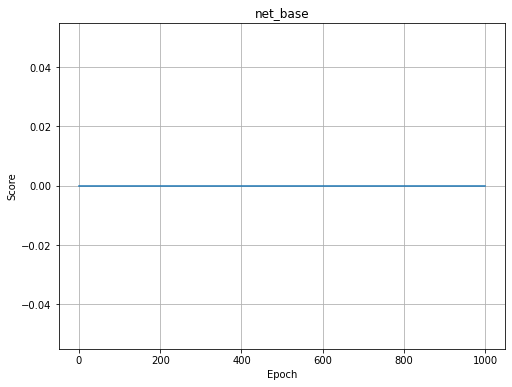

Mean Score:0.0


In [ ]:
folder='nets_MountainCar'
for net_name in sorted(os.listdir(folder)):
  path=os.path.join(folder,net_name)
  scores=pd.read_csv(os.path.join(path,'scores.csv')).values.squeeze()
  padding = np.zeros(num_iterations)
  padding[:scores.shape[0]]=scores
  plt.figure(figsize=(8,6))
  plt.title(net_name)
  plt.plot(padding)
  plt.grid()
  plt.xlabel('Epoch')
  plt.ylabel('Score')
  plt.show()
  print(f'Mean Score:{scores.mean()}')


### Final test

In [ ]:
# Initialize the Gym environment
env = gym.make('MountainCar-v0')
env.seed(1) # Set a random seed for the environment (reproducible results)

# This is for creating the output video in Colab, not required outside Colab
env = wrap_env(env, video_callable=lambda episode_id: True) # Save a video every episode

# Let's try for a total of 10 episodes
for num_episode in range(10): 
    # Reset the environment and get the initial state
    state = env.reset()
    # Reset the score
    score = 200
    done = False

    while not done:
      # Choose the best action (temperature 0)
      action, q_values = choose_action_softmax(policy_net, state, temperature=0)
      # Apply the action and get the next state, the reward and a flag "done" that is True if the game is ended
      next_state, reward, done, info = env.step(action)
      # Visually render the environment
      env.render()
      # Update the final score (-1 for each step)
      score += reward 
      # Set the current state for the next iteration
      state = next_state
      # Check if the episode ended (the pole fell down)
    # Print the final score
    print(f"EPISODE {num_episode + 1} - FINAL SCORE: {score}") 
env.close()

EPISODE 1 - FINAL SCORE: 0.0
EPISODE 2 - FINAL SCORE: 0.0
EPISODE 3 - FINAL SCORE: 0.0
EPISODE 4 - FINAL SCORE: 0.0
EPISODE 5 - FINAL SCORE: 0.0
EPISODE 6 - FINAL SCORE: 0.0
EPISODE 7 - FINAL SCORE: 0.0
EPISODE 8 - FINAL SCORE: 0.0
EPISODE 9 - FINAL SCORE: 0.0
EPISODE 10 - FINAL SCORE: 0.0


In [ ]:
# Display the videos, not required outside Colab
show_videos()